In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Dataset

In [2]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]

## Model

In [3]:
# Load the images in the input folder

batch_size = 1
buffer_size = 1000

datasetTrain = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(buffer_size).batch(batch_size)

# Create the base model from the pre-trained model MobileNet V2
def create_model():
     model = Sequential([
          layers.Dense(4, activation='relu', input_shape=(len(X[0]),)),
          layers.Dense(8, activation='relu'),
          layers.Dense(1, activation='sigmoid')
     ])
     
     model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
     return model

model = create_model()
model.summary()

history = {
    'loss': [],
    'accuracy': []
}


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


## Load Model

In [ ]:
# load model
model = tf.keras.models.load_model("model.h5")

## Train Model and Save

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

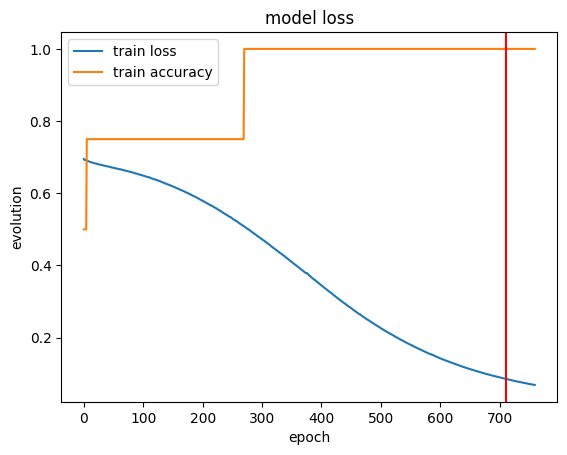

In [15]:
modelLink = "model.h5"



# Entraîner le modèle avec le dataset
model.fit(datasetTrain, epochs=50)

# Sauvegarder le modèle
model.save(modelLink)

for i in range(len(model.history.history["loss"])):
    history["loss"].append(model.history.history["loss"][i])
    history["accuracy"].append(model.history.history["accuracy"][i])


# afficher l'evolution de la perte
plt.plot(history["loss"])
plt.plot(history["accuracy"])
plt.title('model loss')
plt.ylabel('evolution')
# ligne au verticale au point de changement de dataset
plt.axvline(len(history["loss"]) - len(model.history.history["loss"]), color='r')
plt.xlabel('epoch')
plt.legend(['train loss', 'train accuracy'], loc='upper left')
plt.show()

## Predict

In [16]:
# test
X_test = [[0,0],[0,1],[1,0],[1,1]]
y_test = [0,1,1,0]

predict = model.predict(X_test)
print(predict)

1/1 [==============================] - 0s 47ms/step
[[0.08649771]
 [0.9527969 ]
 [0.95149255]
 [0.08232915]]
